In [1]:
from PIL import Image
import cv2 as cv
import os
from tqdm.notebook import tqdm
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imquality import brisque 

In [2]:
load_dotenv()
root = os.getenv("root", ".")

tiger_name = "K 15 M"

In [3]:
data_path = os.path.join(root, "data")
tiger_path = os.path.join(data_path, tiger_name)

images = [cv.imread(os.path.join(tiger_path, f)) for f in os.listdir(tiger_path)]
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB) for img in images]

In [4]:
def plot_image(image, title=None, cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

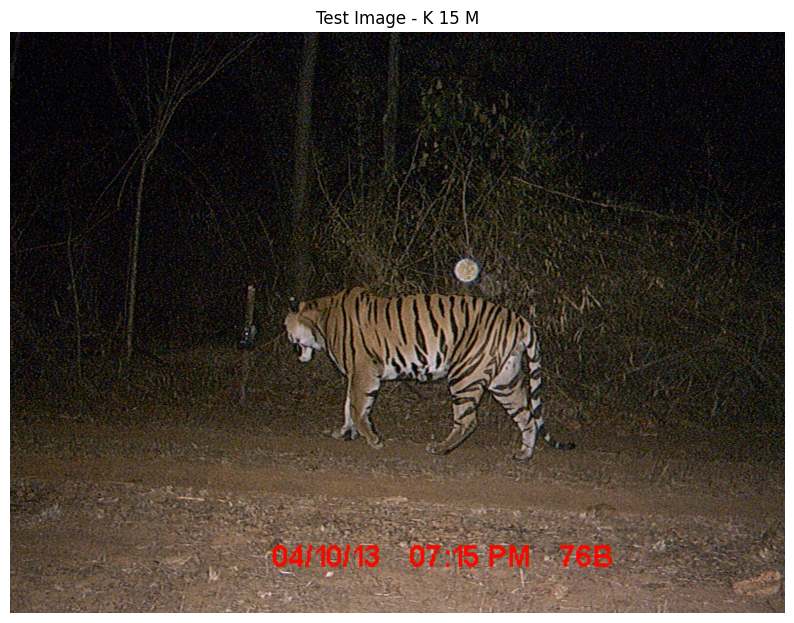

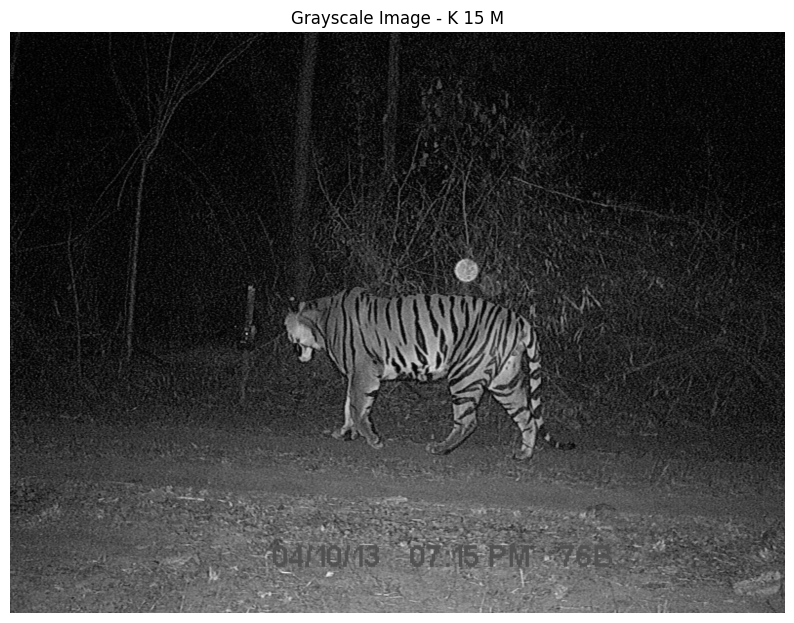

In [5]:
test_img = images[0]
plot_image(test_img, title="Test Image - " + tiger_name)

grey_img = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)
plot_image(grey_img, title="Grayscale Image - " + tiger_name, cmap='gray')

# Sharpness - Laplacian Filter

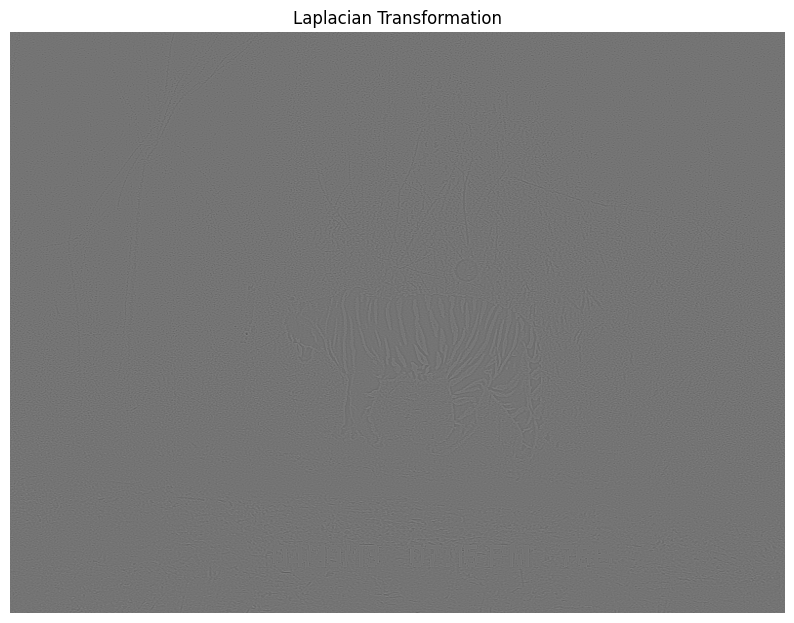

In [6]:
laplacian = cv.Laplacian(grey_img, cv.CV_64F)
plot_image(laplacian, title="Laplacian Transformation", cmap='gray')

In [7]:
print(f'Image Sharpness: {laplacian.var()}')

Image Sharpness: 115.90033931352528


In [8]:
def get_laplacian_variance(image):
    """
    Calculate the variance of the Laplacian of an image to measure sharpness
    """
    grey = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    laplacian = cv.Laplacian(grey, cv.CV_64F)
    return laplacian.var()

0it [00:00, ?it/s]

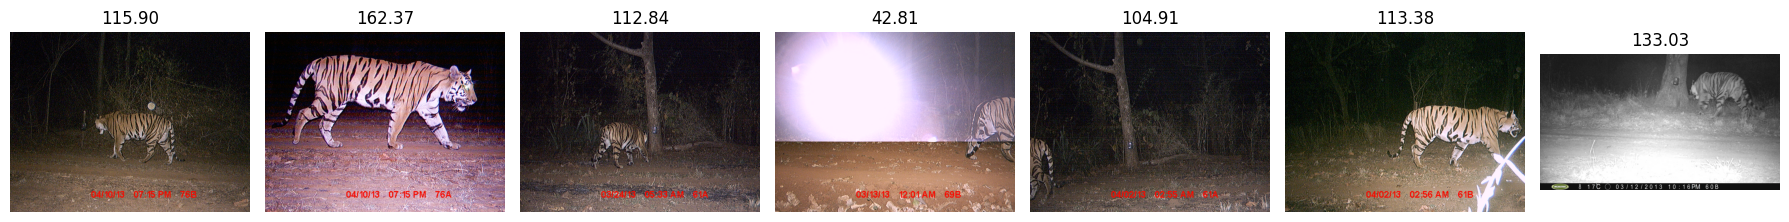

In [9]:
plt.figure(figsize=(18, 6))
for i, img in tqdm(enumerate(images)):
    sharpness = get_laplacian_variance(img)
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.title(f"{sharpness:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Angle analysis

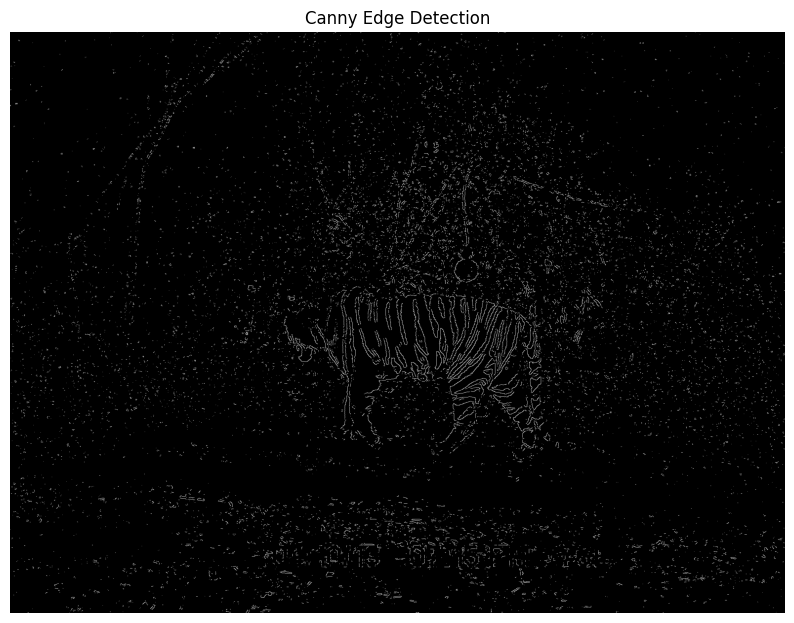

In [ ]:
grey = cv.cvtColor(test_img, cv.COLOR_RGB2GRAY)

canny = cv.Canny(grey, 200, 200)
plot_image(canny, title="Canny Edge Detection", cmap='gray')

Lots of noise in the image, perform morphological opening in order to try to remove the noise

In [ ]:
# kernel = np.ones((5, 5), np.uint8)
# opened = cv.morphologyEx(grey, cv.MORPH_OPEN, kernel)

# canny = cv.Canny(opened, 200, 200)

# plot_image(canny, title="Canny Edge Detection after Morphological Opening", cmap='gray')

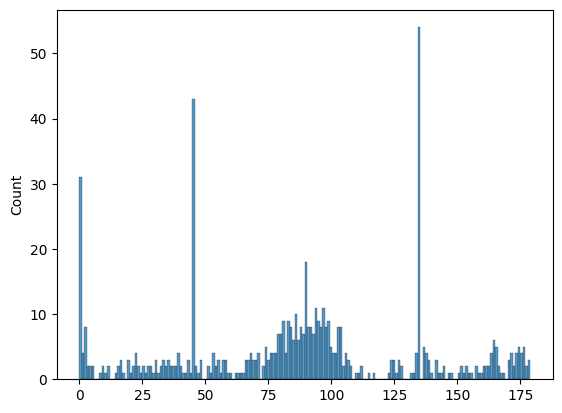

In [ ]:
lines = cv.HoughLines(canny, 1, np.pi/180, threshold=100)

angles = []
for rho, theta in lines[:,0]:
    degrees = np.degrees(theta)
    angles.append(degrees)

sns.histplot(angles, bins=180)
plt.show()